In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

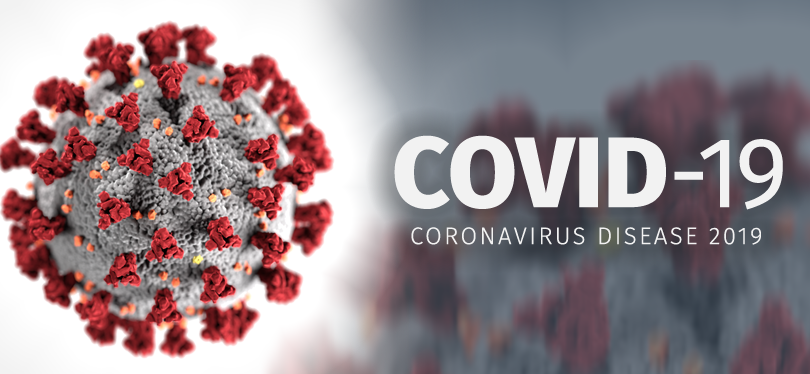

In [26]:
from IPython.display import Image
Image(filename='covid.png')

In [27]:
covid19 = pd.read_csv('COVID19_tweets.csv')

In [28]:
covid19.head()

,TWEET,COMMENTS,LIKES,RETWEETS
0,Government cant use #COVID__19 as excuse to sh...,29,788,1.1K
1,Things are getting back on tracks. Hope for th...,NaN,NaN,NaN
2,This happened between Mbappe and CR7 and CR7 t...,8,119,41
3,Why do the government need a 2 week lockdown t...,NaN,NaN,NaN
4,World is waiting for this day . #COVID__19,NaN,4,NaN


In [31]:
covid19.shape

(55, 4)

In [32]:
covid19.isnull().sum()

TWEET        0
COMMENTS    41
LIKES       20
RETWEETS    35
dtype: int64

In [33]:
stayhometweets = pd.read_csv('stayhometweets.csv')
covid19tweets = pd.read_csv('covid19tweets.csv')
coronatweets = pd.read_csv('coronatweets.csv')
covidtweets = pd.read_csv('covidtweets.csv')
pandemic_tweets = pd.read_csv('pandemic_tweets.csv')

In [34]:
stayhometweets.shape

(247, 4)

In [35]:
stayhometweets.isnull().sum()

TWEET         0
COMMENTS    199
LIKES       100
RETWEETS    170
dtype: int64

In [36]:
covid19tweets.shape

(81, 4)

In [37]:
covid19tweets.isnull().sum()

TWEET        0
COMMENTS    50
LIKES       33
RETWEETS    40
dtype: int64

In [38]:
coronatweets.shape

(72, 4)

In [39]:
coronatweets.isnull().sum()

TWEET        0
COMMENTS    50
LIKES       19
RETWEETS    37
dtype: int64

In [40]:
covidtweets.shape

(125, 4)

In [41]:
covidtweets.isnull().sum()

TWEET        0
COMMENTS    61
LIKES       39
RETWEETS    53
dtype: int64

In [42]:
pandemic_tweets.shape

(158, 4)

In [43]:
pandemic_tweets.isnull().sum()

TWEET         0
COMMENTS    128
LIKES        77
RETWEETS    112
dtype: int64

In [ ]:
# So now we need to group together the tweets from these 6 dataframes

# 1. stayhometweets
# 2. covid19tweets
# 3. coronatweets
# 4. covidtweets
# 5. pandemic_tweets
# 6. covid19

In [45]:
a1 = covid19.append(stayhometweets, ignore_index = True)

In [47]:
a2 = a1.append(covid19tweets, ignore_index = True)

In [49]:
a2.shape

(383, 4)

In [51]:
a3 = a2.append(coronatweets, ignore_index = True)

In [52]:
a4 = a3.append(covidtweets, ignore_index = True)

In [53]:
a5 = a4.append(pandemic_tweets, ignore_index = True)

In [54]:
a5.shape

(738, 4)

In [56]:
a5.isnull().sum()

TWEET         0
COMMENTS    529
LIKES       288
RETWEETS    447
dtype: int64

In [57]:
tweets__covid19 = a5['TWEET']

In [58]:
type(tweets__covid19)

pandas.core.series.Series

In [59]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [60]:
import spacy

In [61]:
tweets__covid19.head()

0    Government cant use #COVID__19 as excuse to sh...
1    Things are getting back on tracks. Hope for th...
2    This happened between Mbappe and CR7 and CR7 t...
3    Why do the government need a 2 week lockdown t...
4           World is waiting for this day . #COVID__19
Name: TWEET, dtype: object

In [62]:
tweets = []

for tweet in tweets__covid19:
    tweets.append(tweet)

In [63]:
sentences = []

for twt in tweets:
    snts = twt.split()
    sentences.append(snts)

In [65]:
words = []

for i in sentences:
    for k in i:
        words.append(k)

In [66]:
words[:11]

['Government',
 'cant',
 'use',
 '#COVID__19',
 'as',
 'excuse',
 'to',
 'shutdown',
 '#EndSWAT',
 '#EndPoliceBrutality',
 '#EndSarsNow']

In [ ]:
# words is a list of all the words that the tweets consists of

In [67]:
len(words)

16547

In [ ]:
# As you can see above that the 'words' list is filled with 19293 words from the 758 tweets

# HASHTAGS

In [68]:
hshtgs = []
words_list = []

for j in words:
    if j.startswith('#'):
        hshtgs.append(j)
    else:
        words_list.append(j)              

In [69]:
len(hshtgs)

2343

In [ ]:
# This shows that about 2343 hashtags were used in these tweets

In [72]:
hshtgs[2330:]

['#pandemic',
 '#Technology',
 '#Pandemic,',
 '#retail',
 '#pandemic',
 '#market',
 '#safety',
 '#Covid_19',
 '#pandemic',
 '#Covid',
 '#pandemic',
 '#RT',
 '#pandemic']

In [ ]:
# Converting all the hashtags to lowercase

In [73]:
hshtgs = [x.lower() for x in hshtgs]

In [74]:
# # Removing the '#' from the hashtags

main_tags = []

for tgs in hshtgs:
    tgs = tgs.replace('#',"")
    main_tags.append(tgs)

In [75]:
len(main_tags)

2343

In [76]:
tags_str = []

for sr in main_tags:
    sr = str(sr)
    tags_str.append(sr)

In [77]:
len(tags_str)

2343

In [78]:
# Removing Punctuations from the 'tags' list which consists of hashtags

import re
tags_str = [re.sub(r'[^A-Za-z0-9]+','', x) for x in tags_str]

In [79]:
from wordcloud import WordCloud

In [80]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(str(tags_str))

# HASHTAGS WORDCLOUD

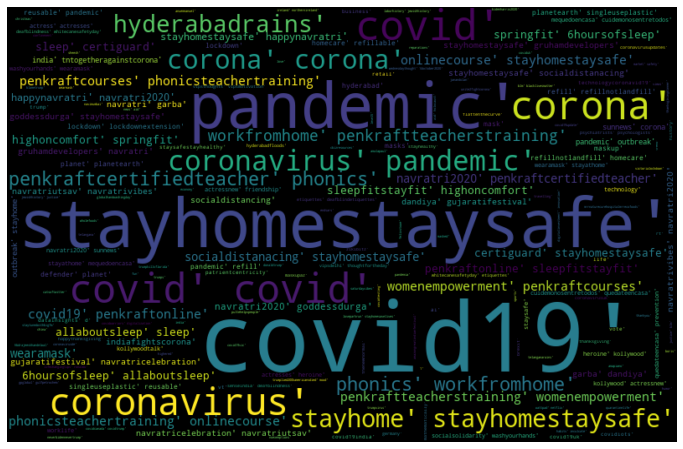

In [81]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,8))
plt.imshow(wordcloud, interpolation='bilinear', aspect ='auto')
plt.axis("off")
plt.savefig('all_covid_hashtag_wordcloud.png', dpi=100)
plt.show()

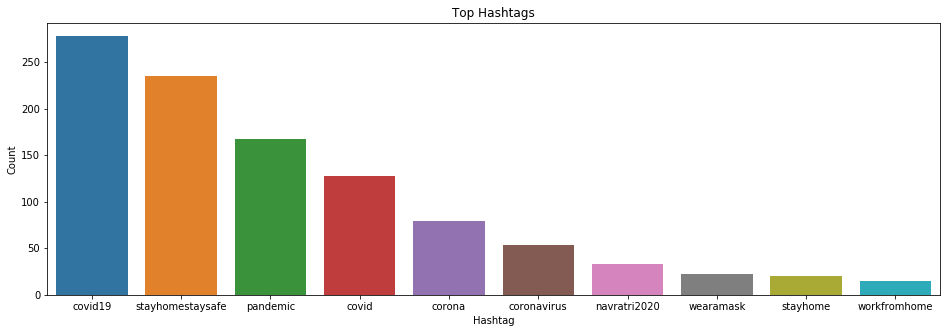

In [82]:
import seaborn as sns
a = nltk.FreqDist(tags_str)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
plt.title('Top Hashtags')
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.savefig('all_covid_top_hashtags.png', dpi=100)
plt.show()

In [83]:
hashtag_freq_list = d

In [84]:
hashtag_freq_list

,Hashtag,Count
0,covid19,278
78,stayhomestaysafe,235
8,pandemic,167
37,covid,128
148,corona,79
30,coronavirus,54
210,navratri2020,33
87,wearamask,22
60,stayhome,20
212,workfromhome,15


In [ ]:
# As the punctuations have been removed, now let's remove the stopwords from the words list 

In [85]:
import re
words_list = [re.sub(r'[^A-Za-z0-9]+','', x.lower()) for x in words_list] 

In [86]:
all_words = []
for m in words_list:
    if m != "":
        all_words.append(m)
        

In [87]:
len(all_words)

13869

In [88]:
import nltk
from nltk.corpus import stopwords
stp = stopwords.words('english')

In [89]:
filter_words = []

for i in all_words:
    if i in stp:
        pass
    else:
        filter_words.append(i)

In [90]:
len(filter_words)

8273

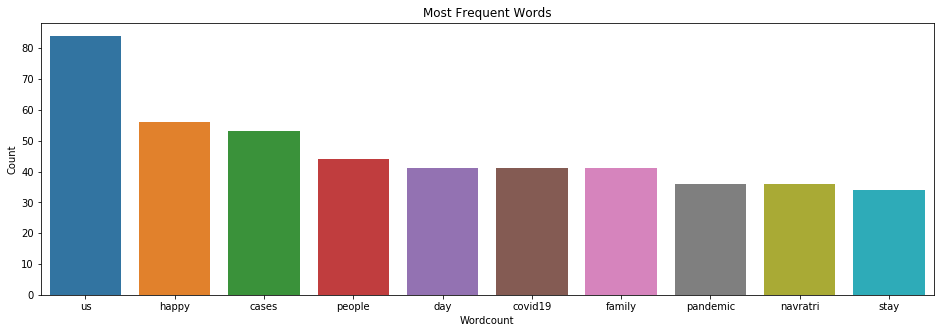

In [91]:
aa = nltk.FreqDist(filter_words)
dd = pd.DataFrame({'Wordcount': list(aa.keys()),
                  'Count': list(aa.values())})
# selecting top 10 most frequent hashtags     
dd = dd.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
plt.title('Most Frequent Words')
ax = sns.barplot(data=dd, x= "Wordcount", y = "Count")
ax.set(ylabel = 'Count')
plt.savefig('all_coivid_all_freq.png', dpi=100)
plt.show()

In [92]:
all_covid_freq_list = dd

In [93]:
all_covid_freq_list

,Wordcount,Count
72,us,84
512,happy,56
323,cases,53
168,people,44
57,day,41
76,covid19,41
853,family,41
368,pandemic,36
644,navratri,36
61,stay,34


In [94]:
wrdcld = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(str(filter_words))

# WORDCLOUD FOR ALL THE WORDS IN THE TWEETS

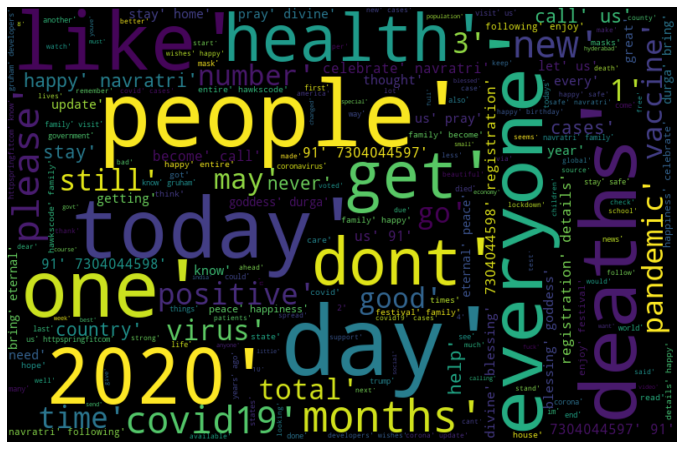

In [95]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,8))
plt.imshow(wrdcld, interpolation='bilinear', aspect ='auto')
plt.axis("off")
plt.savefig('all_covid_most_freq_wordcloud.png', dpi=100)
plt.show()